In [0]:
import shutil
shutil.rmtree('/content/data')
shutil.rmtree('/content/__MACOSX')

In [0]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13338 (delta 1), reused 4 (delta 1), pack-reused 13331
Receiving objects: 100% (13338/13338), 11.97 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (9107/9107), done.


In [0]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-06 14:39:54--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-06 14:39:55--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   222KB/s    in 31m 39s 

2020-05-06 15:11:36 (83.6 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1' Makefile

/content/darknet
sed: -e expression #1, char 17: unterminated `s' command


In [0]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_res = cv::c

Get pretrained weights  .... this can be hopefully changed as per conviniance


In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-05-03 04:54:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights       70%[=============>      ] 166.23M  1.75MB/s    eta 48s    ^C


Helper functions for showing the images using cv2


download functions fro downloading to local machine


upload function for uploading from local machine



In [0]:
#Helper functions

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
#/////////////////////////////////////////


Darknet is now built and ready to run detections using YOLOv3 in the cloud! You can find out which sorts of classes the pretrained YOLOv3 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'


In [0]:
#///////////////////////////////

In [0]:
import shutil

In [0]:

shutil.copy('/content/drive/My Drive/all/YOLO/Gun_data_labeled.zip','/content')

'/content/Gun_data_labeled.zip'

In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/all/YOLO/Gun_data_labeled.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
import os
i=os.listdir('/content/darknet/data/labels')
s=os.listdir('/content/darknet/data/images')

print(len(i),len(s))

0 6762


In [0]:
#labels and images need to be in  the same folder

In [0]:
#!mkdir kk
for p in i:
  #shutil.move('/content/darknet/data/labels/.DS_Store','/content/kk')
  shutil.move('/content/darknet/data/labels/'+p,'/content/darknet/data/images')


In [0]:
#move all the configuration file to thier assigned folders

#shutil.move('/content/data/images','/content/darknet/data')
shutil.move('/content/yolov3_custom_train.cfg','/content/darknet/cfg')
shutil.move('/content/train.txt','/content/darknet/data')
shutil.move('/content/val.txt','/content/darknet/data')
shutil.move('/content/yolo.data','/content/darknet/data')
shutil.move('/content/yolo.names','/content/darknet/data')

'/content/darknet/data/yolo.names'

In [0]:
!ln -s /content/drive/My\ Drive/ /mydrive_2
!ls /mydrive_2

 all  'Colab Notebooks'   new


In [0]:
!ls /mydrive_2/all/YOLO/backup

yolov3_custom_train_last.weights


In [0]:
!./darknet detector train '/content/darknet/data/yolo.data' '/content/darknet/cfg/yolov3_custom_train.cfg'  '/content/darknet53.conv.74' -dont_show
#this snippet trins the YOLOv3

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.459214, GIOU: 0.459214), Class: 0.991828, Obj: 0.017438, No Obj: 0.000483, .5R: 0.500000, .75R: 0.000000, count: 2, class_loss = 0.968550, iou_loss = 1.806148, total_loss = 2.774698 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000086, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000182, iou_loss = 0.000000, total_loss = 0.000182 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000024, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000022, iou_loss = 0.000000, total_loss = 0.000022 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.386685, GIOU: 0.359796), Class: 0.922477, Obj: 0.001836, No Obj: 0.000453, .5R: 0.000000, .75R: 0.000000, count: 2,

In [0]:
%cd cfg
!sed -i 's/batch=5/batch=1/' yolov3_custom_train.cfg
!sed -i 's/subdivisions=1/subdivisions=1/' yolov3_custom_train.cfg
%cd ..           #for checking out the model over our data

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 

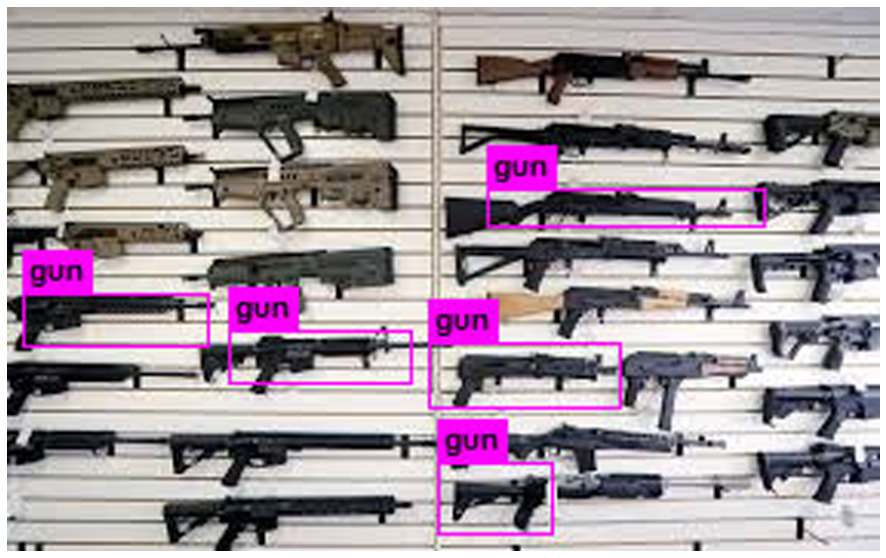

In [0]:
!./darknet detector test /content/darknet/data/yolo.data /content/darknet/cfg/yolov3_custom_train.cfg /mydrive_2/all/YOLO/backup/yolov3_custom_train_4000.weights /content/tests/gun_test_10.jpeg #-thresh 0.3
#check the name of the weight file in goolgle drive
imShow('predictions.jpg')           #prediction over complex  blur image